# Myocardial infarction complications Analysis

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient
- at the time of admission and
- on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping).

MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.

Problems to solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1. the time of admission to hospital:
    
    all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2. the end of the first day (24 hours after admission to the hospital):
    
    all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. the end of the second day (48 hours after admission to the hospital) :
    
    all input columns (2-112) except 95, 102, 105 can be used for prediction;
4. the end of the third day (72 hours after admission to the hospital):
    
    all input columns (2-112) can be used for prediction.

- please uncomment the following cell if those libraries are not installed in your envoriment already

In [ ]:

!pip install prettytable
!pip install  imbalanced-learn

- if an error existed while running the following cell -> run it twice

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from imblearn.over_sampling import ADASYN
import pandas as pd

# Sample DataFrame with features and multi-target columns
data = {
    'feature_1': [1, 0, 1, 0, 0],
    'feature_2': [0, 1, 0, 1, 0],
    'feature_3': [1, 1, 0, 0, 0],
    'target_1': [0, 1, 0, 1, 1],
    'target_2': [1, 0, 0, 1, 0],
    'target_3': [1, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Separate features and target variables
X = df.drop(['target_1', 'target_2', 'target_3'], axis=1)
targets = ['target_1', 'target_2', 'target_3']

# Apply ADASYN oversampling separately to each target variable
oversampled_df = pd.DataFrame(columns=df.columns)
adasyn = ADASYN(sampling_strategy='auto', n_neighbors=2, random_state=42)  # Adjust the number of neighbors
for target in targets:
    X_resampled, y_resampled = adasyn.fit_resample(X, df[target])
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                              pd.DataFrame(y_resampled, columns=[target])], axis=1)
    oversampled_df = oversampled_df.append(df_resampled, ignore_index=True)

print(oversampled_df)


ValueError: No samples will be generated with the provided ratio settings.

## Importing the Required Libraries

In [ ]:
import pandas as pd # algebraic computations , read and write to csv

import numpy as np # linear algebra and arrays muniplication

import time                               # measure excution time of some functions

############  importing the data visualization libraries :##############

import matplotlib.pyplot as plt
import seaborn as sns

############  Import Classifiers #################

from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
############  Import Data Visualization  #################
import seaborn as sns
import matplotlib.pyplot as plt

# Measure excution time
import time
############  Import Make Pipeline  #################
from sklearn.pipeline import make_pipeline

# Importing a model to split the training set from the evaluation set
from sklearn.model_selection import train_test_split

# feature Extraction and feature engineering :

from sklearn.preprocessing import  StandardScaler


############  Evaluation Metric  #################
from sklearn.metrics import f1_score , make_scorer , roc_auc_score, average_precision_score , accuracy_score

############  GridSearchCV #################
from sklearn.model_selection import GridSearchCV


### 1- Data Exploration

In [ ]:
!wget https://s3-eu-west-1.amazonaws.com/pstorage-leicester-213265548798/23581310/MyocardialinfarctioncomplicationsDatabase.csv



--2024-05-11 15:19:01--  https://s3-eu-west-1.amazonaws.com/pstorage-leicester-213265548798/23581310/MyocardialinfarctioncomplicationsDatabase.csv
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.108.107, 52.218.40.147, 52.218.30.243, ...
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.108.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 437563 (427K) [text/csv]
Saving to: ‘MyocardialinfarctioncomplicationsDatabase.csv.1’

Myocardialinfarctio 100%[===================>] 427.31K  1021KB/s    in 0.4s    

2024-05-11 15:19:02 (1021 KB/s) - ‘MyocardialinfarctioncomplicationsDatabase.csv.1’ saved [437563/437563]



In [ ]:
# read the data set and save it in a Pandas Data frame format
df = pd.read_csv('MyocardialinfarctioncomplicationsDatabase.csv')

In [ ]:
print(f'the data set is of shape {df.shape} \n')
df.head(5)

the data set is of shape (1700, 124) 



,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  exploring general Features Data types
# The data set contains  float64(110), int64(14) Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


In [ ]:
# exploring general statistics about the data set ( Features Data types, Mean , Max , min ....)
# we can see that some features clearly contain NAN values
df.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.shape

(1700, 124)

In [ ]:
# splitting the features from targets
features_Indc = np.arange(0,113)
Target_Indc = np.arange(113,124)
targets  = df.iloc[: , Target_Indc].columns.tolist()
features  = df.iloc[: , features_Indc].columns.tolist()

In [ ]:
# The target variables doesn't contain any missing values
df[targets].isna().sum()

PREDS_TAH     0
JELUD_TAH     0
FIBR_JELUD    0
A_V_BLOK      0
OTEK_LANC     0
RAZRIV        0
DRESSLER      0
ZSN           0
REC_IM        0
P_IM_STEN     0
LET_IS        0
dtype: int64

In [ ]:
df[targets].nunique()

PREDS_TAH     2
JELUD_TAH     2
FIBR_JELUD    2
A_V_BLOK      2
OTEK_LANC     2
RAZRIV        2
DRESSLER      2
ZSN           2
REC_IM        2
P_IM_STEN     2
LET_IS        8
dtype: int64

#### - Missing values

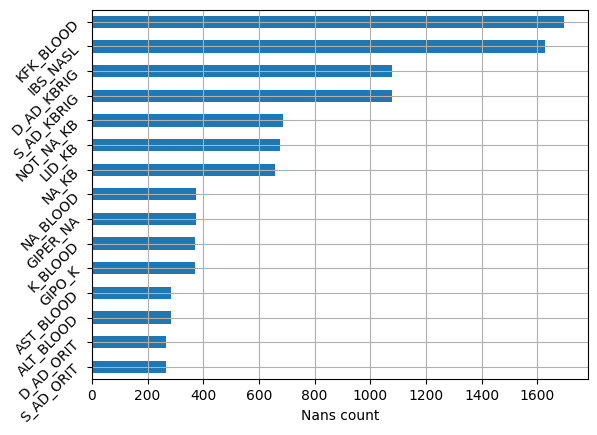

In [ ]:
# show the top 15 features with missing values
df[features].isna().sum(axis=0).nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('Nans count')
plt.yticks(rotation=45)
plt.show()

In [ ]:
# extract the features with very high percentage of missing values
# we make a function to map the features with high numbe of NAN to 'Nan' and 'OK' otherwise
def ExtractNans(x):
    isnan = False
    if x > 0.3 :
        isnan = True
    return isnan
df_sorted_by_nans = df[features].isna().sum(axis=0).divide(len(df)).sort_values(ascending=False)

In [ ]:
# we found 7 features with more than 30% of NANs
df_sorted_by_nans.apply(ExtractNans).sum(axis=0)

7

In [ ]:
# to drop these features we need to extract the feature names and save it to a list
f_to_drop = df_sorted_by_nans[df_sorted_by_nans.apply(ExtractNans) == True].index.tolist()
print(f_to_drop)

['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB']


#### - Cardinality check :

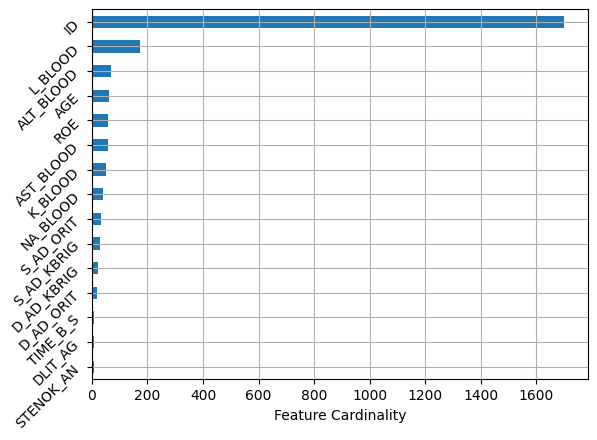

ID               1700
L_BLOOD           174
ALT_BLOOD          69
AGE                62
ROE                58
                 ... 
ritm_ecg_p_04       2
ritm_ecg_p_02       2
ritm_ecg_p_01       2
IM_PG_P             2
n_r_ecg_p_09        2
Length: 124, dtype: int64

In [ ]:
# plot the feature cardinality in descending order
df[features].nunique().nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('Feature Cardinality')
plt.yticks(rotation=45)
plt.show()
df.nunique().sort_values(ascending=False)

In [ ]:
# extract the Binary features
feature_cardinality = df[features].nunique()
Binary = feature_cardinality[feature_cardinality == 2].index.tolist()
print(f'We found {len(Binary)} Binary_features including : \n {Binary[:10]} ....' )

We found 79 Binary_features including : 
 ['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08'] ....


#### - Duplicates Removal

In [ ]:
# we must drop the ID beacuse it's unique for each record
# we will extract the duplicated records ( records that are Identical in both features and lables)
dup = df[features].drop(columns=['ID'] , axis=0).duplicated().sum()
print(f'the number of dublicated records in the data set = {dup} records')

the number of dublicated records in the data set = 0 records


## Data Preprocessing


in general there are some preprocessing can be applied despite of the case we are examining :

#### 1-Handling missing values:


In [ ]:
# Remove columns with many NANs :
f_to_drop.append('ID')
print(f'The dropped columns are {f_to_drop}')
df_features = df[features].copy(deep=True).drop(columns = f_to_drop , axis = 0)

The dropped columns are ['KFK_BLOOD', 'IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB', 'ID']


In [ ]:
df_features.shape

(1700, 105)

- Filling missing values  :


###### A- Binary Fearutes

In [ ]:
feature_cardinality = df_features.nunique()
Binary_features = feature_cardinality[feature_cardinality == 2].index.tolist()
len(Binary_features)

75

In [ ]:
df_features[Binary_features].isna().sum().sort_values(ascending = False)*100/len(df_features)

GIPER_NA         22.058824
GIPO_K           21.705882
ritm_ecg_p_08     8.941176
ritm_ecg_p_01     8.941176
ritm_ecg_p_04     8.941176
                   ...    
zab_leg_03        0.411765
zab_leg_04        0.411765
IM_PG_P           0.058824
SEX               0.000000
FIBR_PREDS        0.000000
Length: 75, dtype: float64

In [ ]:
# In order to avoid Biasing the data we can not choose 1 or zero as fixed value to be filled with
# we can not use sklearn imputers here since it will either :
# average the values of the knighbours (KNN imputer) - take the mean or most frequent (simple imputer)
# we will choose forward fill just to add randomness to the filling process
df_features[Binary_features] = df_features[Binary_features].fillna(method='ffill')

In [ ]:
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
(df_features.index == df[targets].index).sum()

1700

###### B- Float Fearutes

In [ ]:
float_features = [x for x in df_features.columns.tolist() if x not in Binary_features]
print(f'The data set has {len(float_features)} not binary features most of them contain missing values')

The data set has 30 not binary features most of them contain missing values


In [ ]:
# we choose the simnuniquemputer with filling with mean strategy
# since we already filled the binary columns we can apply sklearn simple imputer to the entire data frame
# we loop Through the columns  compute the mean and fill all NANs with the mean
for c in float_features :
    mean = df_features[c].mean()
    df_features[c] = df_features[c].fillna(value= mean)

In [ ]:
# df_features.isna().sum().sort_values(ascending = False)

## Case-1 :
- ZSN as a target variable (chronic heart failure)

In [ ]:
(df_features.index == df['ZSN'].index).sum()

1700

In [ ]:
# we concatinate the 2 data frames to insure the indexes order is preserved
df_case1 = pd.concat([df_features, df['ZSN'].astype('uint8')], axis=1).reindex(df_features.index)

In [ ]:
y_c1 = df_case1['ZSN'].astype('uint8') # The target variable is ZSN
X_C1 = df_case1.drop(columns=['ZSN'] , axis=0).copy('deep')                      # we will use all the features

### Trarget Variable analysis

In [ ]:
zero = y_c1.value_counts()[0]
one = y_c1.value_counts()[1]
print (f'The target variable has {zero} : class "0" {100*zero/len(y_c1):0.2f}% \n and  {one} : class "1" {100*one/len(y_c1):0.2f}% \nthe data set is very imbalanced as expected ')

The target variable has 1306 : class "0" 76.82% 
 and  394 : class "1" 23.18% 
the data set is very imbalanced as expected 


ZSN
0    1306
1     394
Name: count, dtype: int64

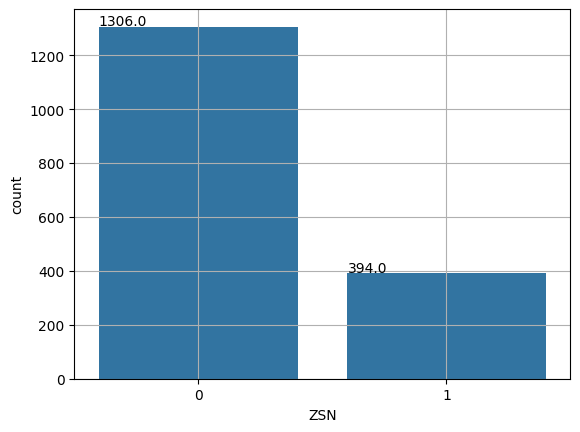

In [ ]:
ax = sns.barplot(x=y_c1.value_counts().index, y=y_c1.value_counts())
plt.grid()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
y_c1.value_counts()

- Data split to Train+validation -- Test Split

In [ ]:
# Train+validation - Test Split :
X_train_val, X_test, y_train_val, y_test = train_test_split(X_C1, y_c1, train_size = 0.9, random_state = 42, shuffle = False)

In [ ]:
print(f'X_train_val:{X_train_val.shape}| X_test :{X_test.shape} \ny_train_val{y_train_val.shape}| y_test{y_test.shape}')

X_train_val:(1530, 105)| X_test :(170, 105) 
y_train_val(1530,)| y_test(170,)


### Outlier Detection :
- In majority of the cases Outlier detection should be done at the initial stage of data pre-processing while feature extraction / selection can be done in the last part of data pre-processing.
- Outlier detection should be applied to the training data only since it aims to remove records and shouldn't be applied to test data.

- 1- Box Plots analysis  :

FileNotFoundError: [Errno 2] No such file or directory: './images/Box Plot analysis for float features.png'

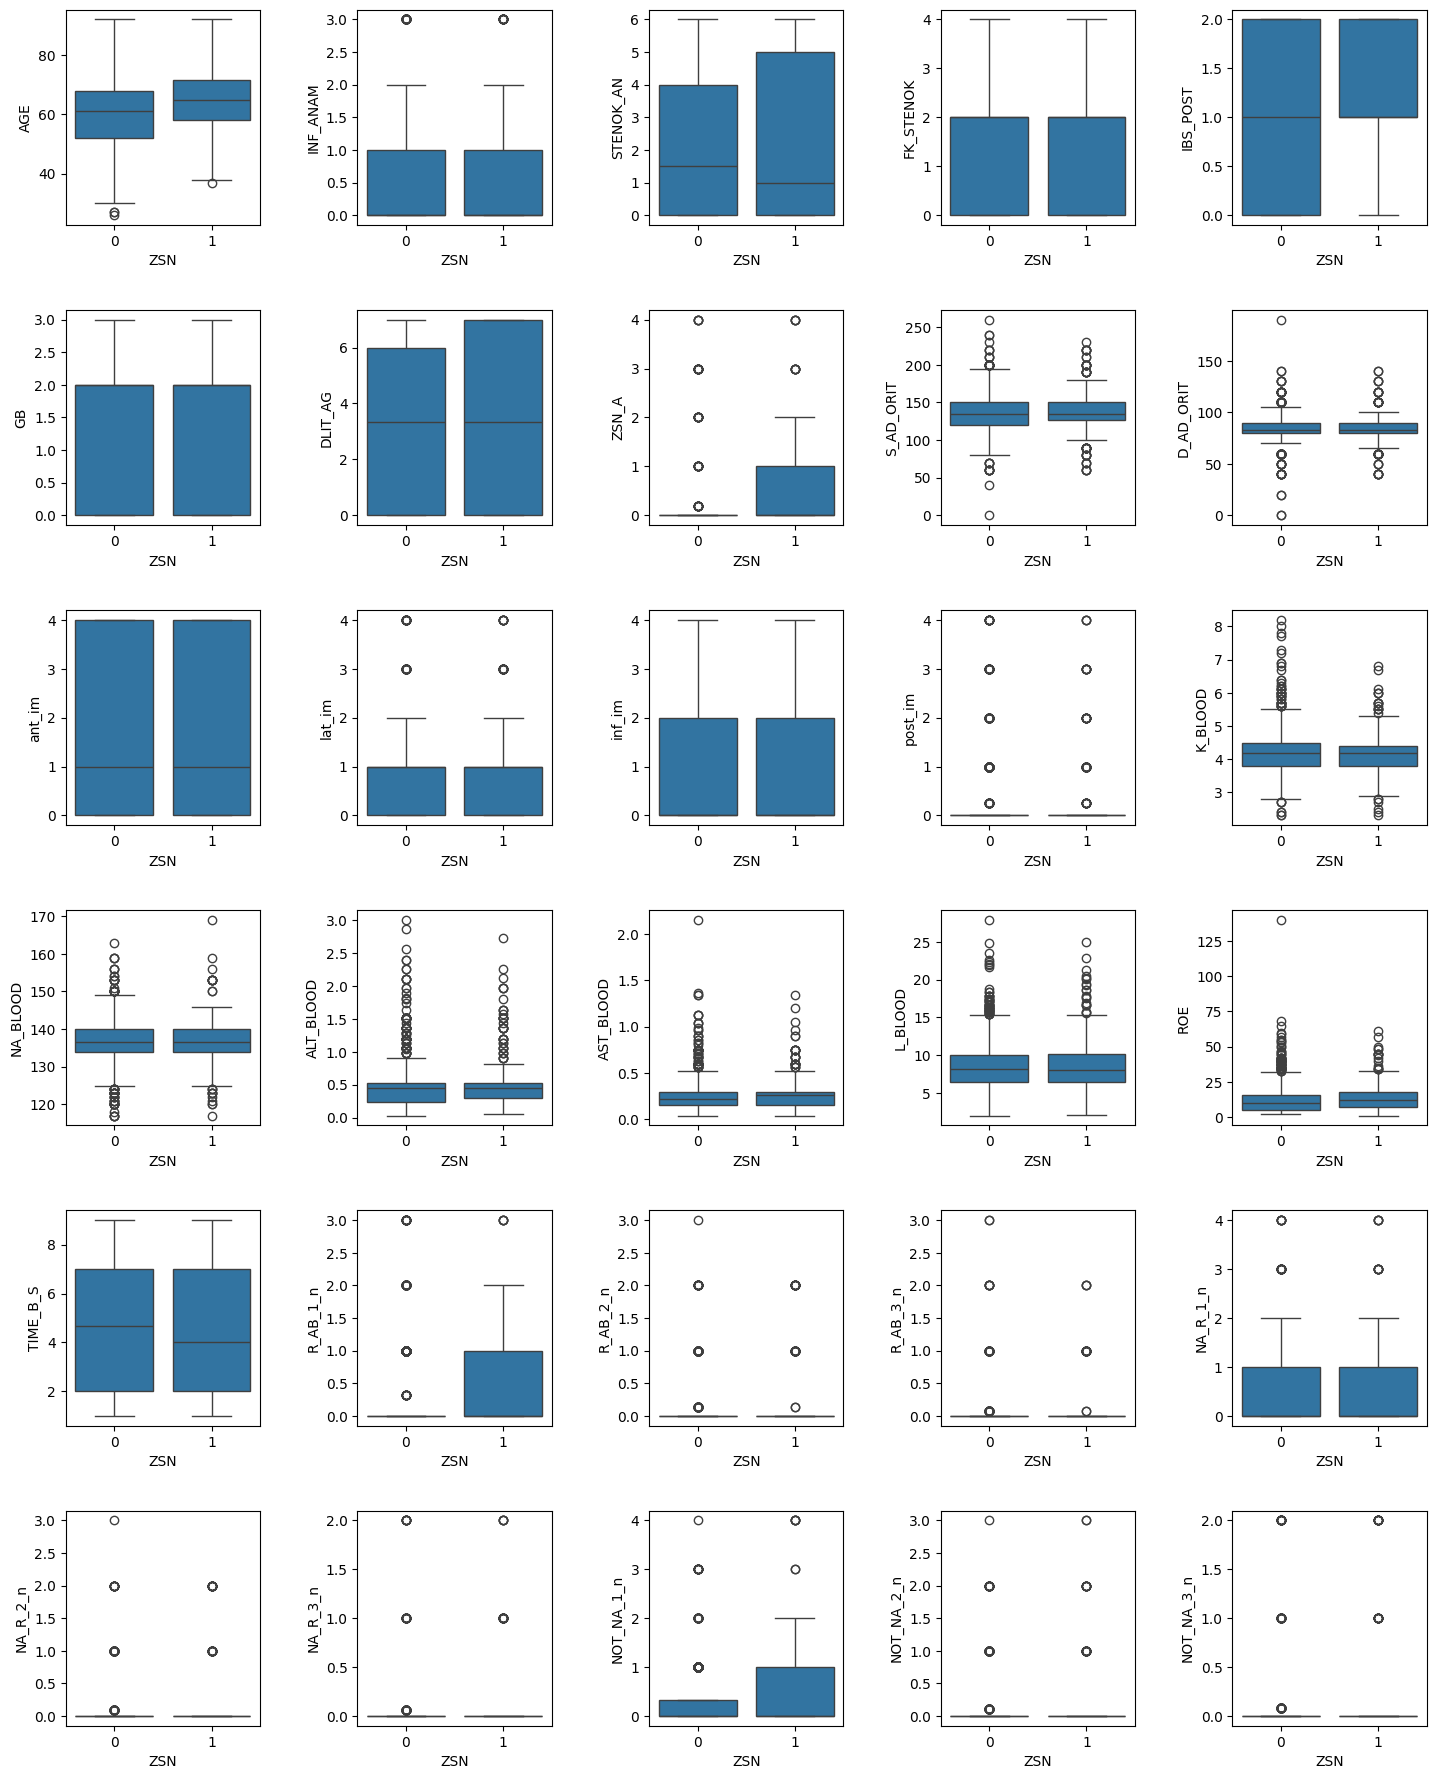

In [ ]:
df_non_binary = X_train_val[float_features].copy(deep=True)
fig = plt.figure(figsize=(15,30))
for i in enumerate(float_features):
    plt.subplot(10,5,i[0]+1)
    sns.boxplot(x = y_train_val, y = i[1], data = df_non_binary)
fig.tight_layout(pad = 3.0)


- 1- Isolation_Forest :

In [ ]:
train_outliers = X_train_val.copy(deep=True)
print(train_outliers.shape)

(1530, 105)


- for isolation forest feature scaling will not make difference
- but to be coherent when comparing the other methods we will do it

In [ ]:
sc = StandardScaler()
scaler = sc.fit(train_outliers)
scaled = sc.transform(train_outliers)
train_outliers = pd.DataFrame(scaled , columns= train_outliers.columns , index = train_outliers.index)
train_outliers.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
0,1.395471,0.749149,1.800214,-0.513966,-0.167671,1.067121,1.483799,-0.183804,1.299458,-0.280724,...,-0.277744,-0.229215,1.591693,-0.390011,-1.485782,0.626239,0.566783,-0.138998,-0.521364,-0.334542
1,-0.558490,0.749149,0.575707,-0.940650,-1.139941,-1.435197,-1.267736,-0.183804,-1.144053,-0.280724,...,-0.277744,-0.229215,1.591693,-0.390011,0.673046,0.626239,0.566783,-0.138998,1.918046,-0.334542
2,-0.824939,0.749149,-0.648800,-0.940650,-1.139941,1.067121,0.566620,-0.183804,-0.445907,-0.280724,...,5.045412,5.883347,1.591693,2.564031,-1.485782,0.626239,0.566783,-0.138998,-0.521364,-0.334542
3,0.596123,-1.334848,-0.648800,-0.940650,-1.139941,1.067121,0.566620,-0.183804,-0.096834,1.555439,...,-0.277744,-0.229215,-0.628262,-0.390011,0.673046,0.626239,0.566783,-0.138998,-0.521364,-0.334542
4,-0.114408,0.749149,-0.648800,-0.940650,-1.139941,1.067121,1.483799,-0.183804,1.299458,-0.280724,...,-0.277744,-0.229215,-0.628262,-0.390011,0.673046,-1.596836,0.566783,-0.138998,1.918046,-0.334542


In [ ]:
# We should apply the same feature scaling to the test data also :
X_test_scaled = sc.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled , columns= X_test.columns , index = X_test.index)
X_test_scaled_df.head(3)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
1530,-0.380857,0.749149,-0.648800,-0.940650,-1.139941,-1.435197,-1.267736,-0.183804,-1.144053,-0.280724,...,-0.277744,-0.229215,-0.628262,-0.390011,-1.485782,0.626239,0.566783,-0.138998,-0.521364,-0.334542
1531,-0.736123,0.749149,1.800214,0.339401,1.776868,1.067121,-1.267736,5.440588,1.299458,5.227767,...,-0.277744,-0.229215,-0.628262,2.564031,0.673046,0.626239,-1.764342,-0.138998,-0.521364,-0.334542
1532,2.017186,-1.334848,-0.648800,0.047628,0.031922,0.017028,0.566620,-0.183804,1.299458,0.076245,...,-0.277744,-0.229215,-0.628262,-0.390011,0.673046,0.626239,0.566783,-0.138998,-0.521364,-0.334542


In [ ]:
df_outliers = train_outliers.copy(deep=True)

In [ ]:
df_outliers['ZSN'] = y_train_val  # This we be used to discard the outliers later

In [ ]:
#isolation forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state = 42, n_estimators=1000 ).fit(train_outliers)

iso_forest_predictions = clf.predict(train_outliers) #-1s identify outliers for better visualization we map it again

In [ ]:
np.unique(iso_forest_predictions , return_counts=True)

(array([-1,  1]), array([  18, 1512]))

- A score close to -1 indicates anomalies
- Score much close to 1  indicates normal observations
- If all scores are close to 0.0 then the entire sample does not seem to have clearly distinct anomalies

- Visualizing the decision function of the Isolation Forest

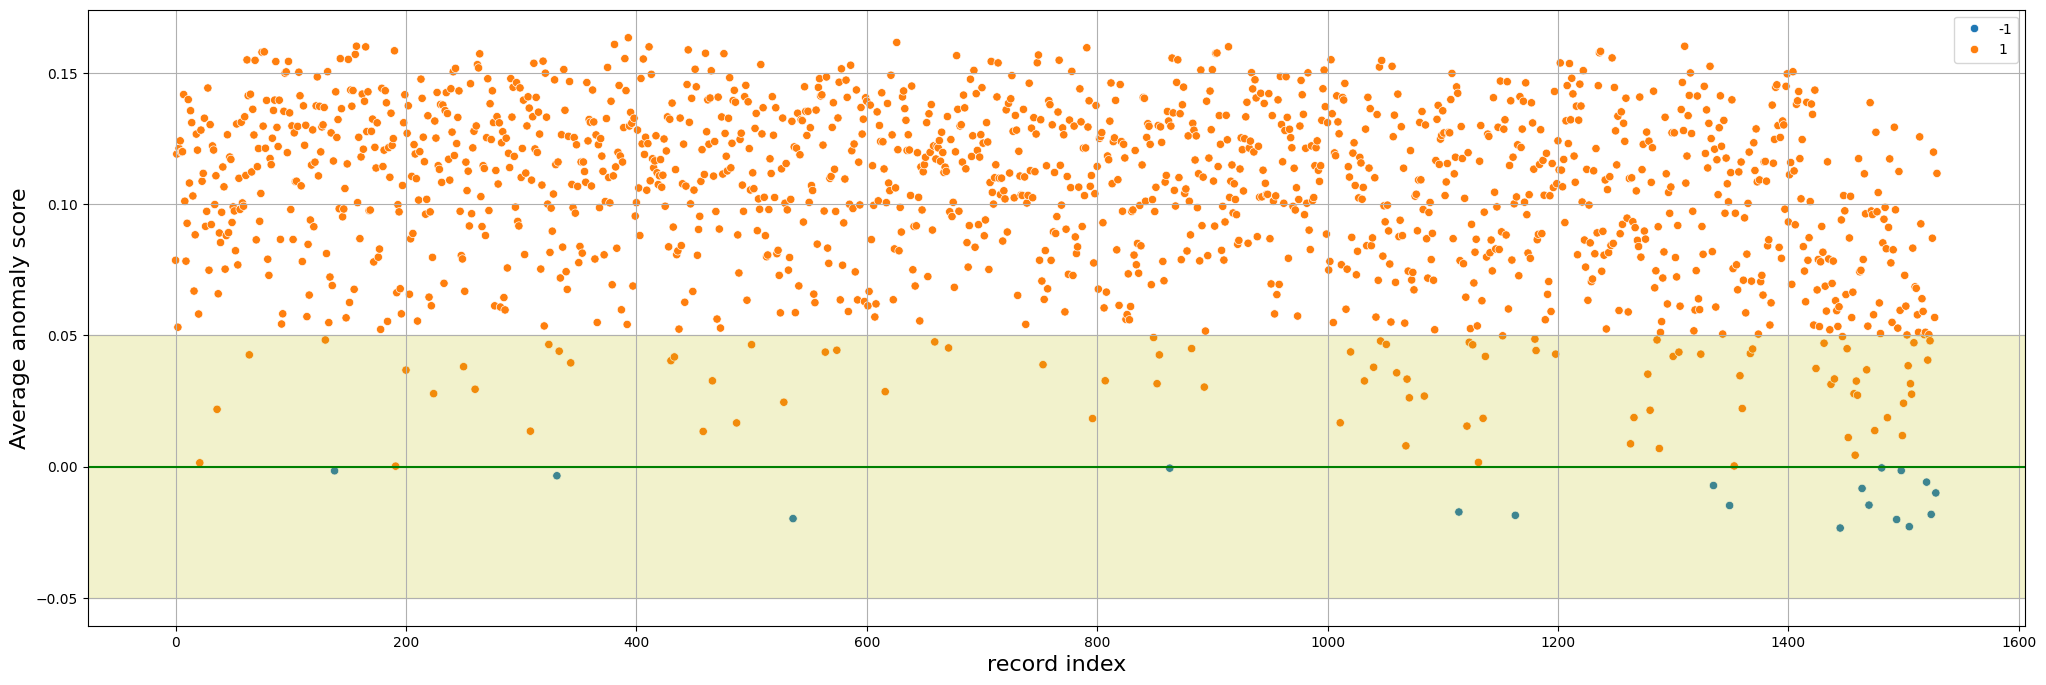

In [ ]:
dec = clf.decision_function(train_outliers)
both = list(zip(dec, iso_forest_predictions))
x_samples = [x for x,y in both]
y_samples = [y for x,y in both]
plt.figure(figsize=(25,8))
palette = {
    -1: 'tab:blue',
    1: 'tab:orange'}
graph = sns.scatterplot(x=np.arange(len(x_samples)) , y = x_samples , hue=y_samples , palette=palette )
graph.axhline(0.0 , color = 'g')
plt.xlabel('record index', fontsize=16)
plt.ylabel('Average anomaly score', fontsize=16)
plt.grid()
plt.legend()
plt.axhspan(-0.05,0.05 , alpha=0.2 , color='y')
plt.show()

In [ ]:
# Extract the outlier indeces and the inliers indeces
num_outliers = len(np.where(iso_forest_predictions == -1 )[0])
#### ISO_FOREST outliers :
ISO_ind = np.where(iso_forest_predictions == 1 )[0]
ISO_outliers = np.where(iso_forest_predictions == -1 )[0]
print(f"X_train_val : {len(train_outliers)} | Iso_outliers : {num_outliers} which represents {100*num_outliers/len(train_outliers):0.1f}% from the Training data")

X_train_val : 1530 | Iso_outliers : 18 which represents 1.2% from the Training data


- 2- Local outlier Factor :
    - since the implementation is based on KNN and distance measure it's better to scale before applying the algorithm

In [ ]:
#local outlier factor
from sklearn.neighbors import LocalOutlierFactor
# feature scaling
lof = LocalOutlierFactor(n_neighbors=10, contamination= 0.03)
lof_predictions = lof.fit_predict(train_outliers) #-1s identify outliers
X_scores = lof.negative_outlier_factor_

In [ ]:
num_outliers = len(np.where(lof_predictions == -1 )[0])
print(f"X_train_val : {len(train_outliers)} | lof_outliers : {num_outliers} which represents {100*num_outliers/len(train_outliers):0.1f}% from the Training data")

X_train_val : 1530 | lof_outliers : 46 which represents 3.0% from the Training data


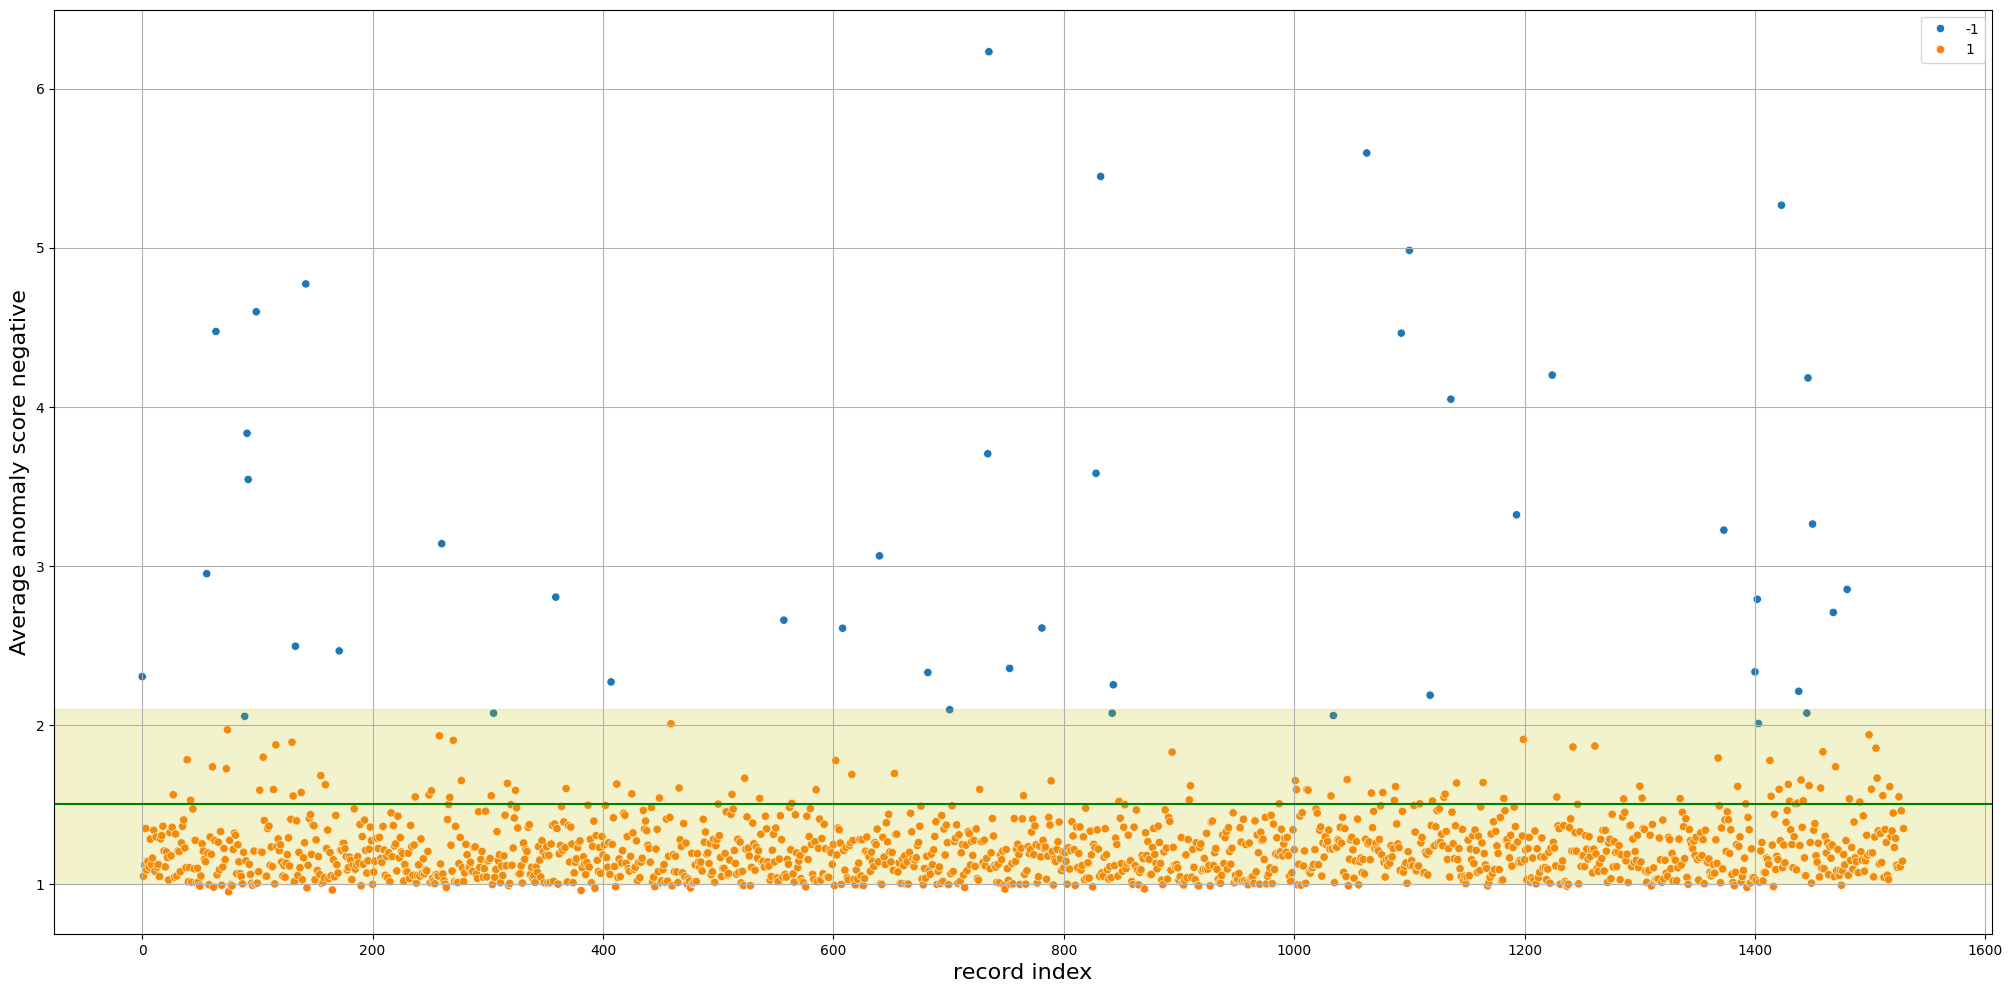

In [ ]:
both = list(zip(X_scores, lof_predictions))
x_samples = [-x for x,y in both]
y_samples = [y for x,y in both]
plt.figure(figsize=(25,12))
palette = {
    -1: 'tab:blue',
    1: 'tab:orange'}
graph = sns.scatterplot(x=np.arange(len(x_samples)) , y = x_samples , hue=y_samples , palette=palette )
graph.axhline(1.5 , color = 'g')
plt.xlabel('record index', fontsize=16)
plt.ylabel('Average anomaly score negative', fontsize=16)
plt.grid()
plt.legend()
plt.axhspan(1,2.1 , alpha=0.2 , color='y', label ='inliners')
plt.show()

In [ ]:
# Extract the outlier indeces and the inliers indeces
lof_ind = np.where(lof_predictions == 1 )[0]
lof_outliers = np.where(lof_predictions == -1 )[0]

##### Baseline model
- we will train a base model with all the features and without hyper parameter tuning to be considered as baseline

In [ ]:
from prettytable import PrettyTable
t = PrettyTable()  # visualiza the results in a well compact table
t.field_names = ['classifier', 'f1', 'auc', 'accuracy','execution_time'] #f1 , auc , accuracy . execution_time
models = {'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors=4 ) ,\
           'SVC' : SVC(random_state=42)  , \
          'LogisticRegression' :  LogisticRegression(random_state=42 ) ,
         'RandomForestClassifier' : RandomForestClassifier(random_state=42) }

In [ ]:
# function to train and evaluate models

def model_eval (X_train, X_test, y_train, y_test , clf , clf_name):
    start = time.time()
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    end = time.time()
    execution_time = f'{end - start :0.3f}'
    f1 = f1_score(y_test, y_pred)
    auc =  roc_auc_score(y_test, y_pred),
    accuracy = accuracy_score(y_test, y_pred)
    return f1 , auc[0] ,  accuracy  , execution_time

- 1- lof oultier

In [ ]:
def train_outliers_fun(inliner_ind , method_name  , models = models , training_set = df_outliers):
    t = PrettyTable()  # visualiza the results in a well compact table
    t.field_names = ['classifier', 'f1', 'auc', 'accuracy' , 'execution_time'] #f1 , auc , pr_auc
    print(training_set.shape)
    train_set = training_set.copy(deep=True).iloc[inliner_ind]
    # we extract the training features and labels afterremoving the outliers
    y_train_val = train_set['ZSN']   # training features
    print('y_train.shape : ' , y_train_val.shape)
    X_train_val = train_set.drop( columns=['ZSN']) # training labels
    print('X_train_val.shape : ' , X_train_val.shape)
    # We split the tarining data to train/val
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val \
                                                      , train_size = 0.8, random_state = 42,\
                                                      shuffle = False)
    # compare the results of all models with default settings
    for clf_name ,clf  in models.items():

        f1 , auc , accuracy , execution_time = model_eval (X_train, X_valid, y_train, y_valid , clf , clf_name)
        t.add_row ([clf_name , f1 , auc , accuracy , execution_time])

    print(f'Results for {method_name} are : \n' , t)
    return X_train_val , y_train_val

In [ ]:
X_train_val_lof , y_train_val_lof = train_outliers_fun(inliner_ind = lof_ind , method_name = 'LOF' , models = models )

(1530, 106)
y_train.shape :  (1484,)
X_train_val.shape :  (1484, 105)
Results for LOF are : 
 +------------------------+---------------------+--------------------+--------------------+----------------+
|       classifier       |          f1         |        auc         |      accuracy      | execution_time |
+------------------------+---------------------+--------------------+--------------------+----------------+
|  KNeighborsClassifier  |  0.0759493670886076 | 0.5010822510822511 | 0.7542087542087542 |     0.030      |
|          SVC           | 0.12658227848101267 | 0.5205627705627706 | 0.7676767676767676 |     0.142      |
|   LogisticRegression   | 0.24242424242424243 | 0.512987012987013  | 0.6632996632996633 |     0.071      |
| RandomForestClassifier | 0.19999999999999998 | 0.5357142857142857 | 0.7575757575757576 |     0.380      |
+------------------------+---------------------+--------------------+--------------------+----------------+


- 2- ISO oultier

In [ ]:
X_train_val_ISO , y_train_val_ISO = train_outliers_fun(inliner_ind = ISO_ind , method_name = 'ISO' , models = models )

(1530, 106)
y_train.shape :  (1512,)
X_train_val.shape :  (1512, 105)
Results for ISO are : 
 +------------------------+---------------------+--------------------+--------------------+----------------+
|       classifier       |          f1         |        auc         |      accuracy      | execution_time |
+------------------------+---------------------+--------------------+--------------------+----------------+
|  KNeighborsClassifier  | 0.10126582278481013 | 0.5067460317460317 | 0.7656765676567657 |     0.033      |
|          SVC           | 0.12987012987012986 | 0.5209325396825396 | 0.7788778877887789 |     0.145      |
|   LogisticRegression   | 0.31654676258992803 | 0.5621031746031746 | 0.6864686468646864 |     0.039      |
| RandomForestClassifier | 0.19277108433734938 | 0.5384920634920635 | 0.7788778877887789 |     0.398      |
+------------------------+---------------------+--------------------+--------------------+----------------+


- we will choose lof and combine it with the feature selection methods

### feature correlation

In [ ]:
corr_df_test = X_train_val_lof[float_features].copy(deep=True)
corr_df_test.shape

(1484, 30)

In [ ]:
corr_df_test['ZSN'] = y_train_val_lof.values
corr_df_test.shape

(1484, 31)

##### 1- pearseon correlation

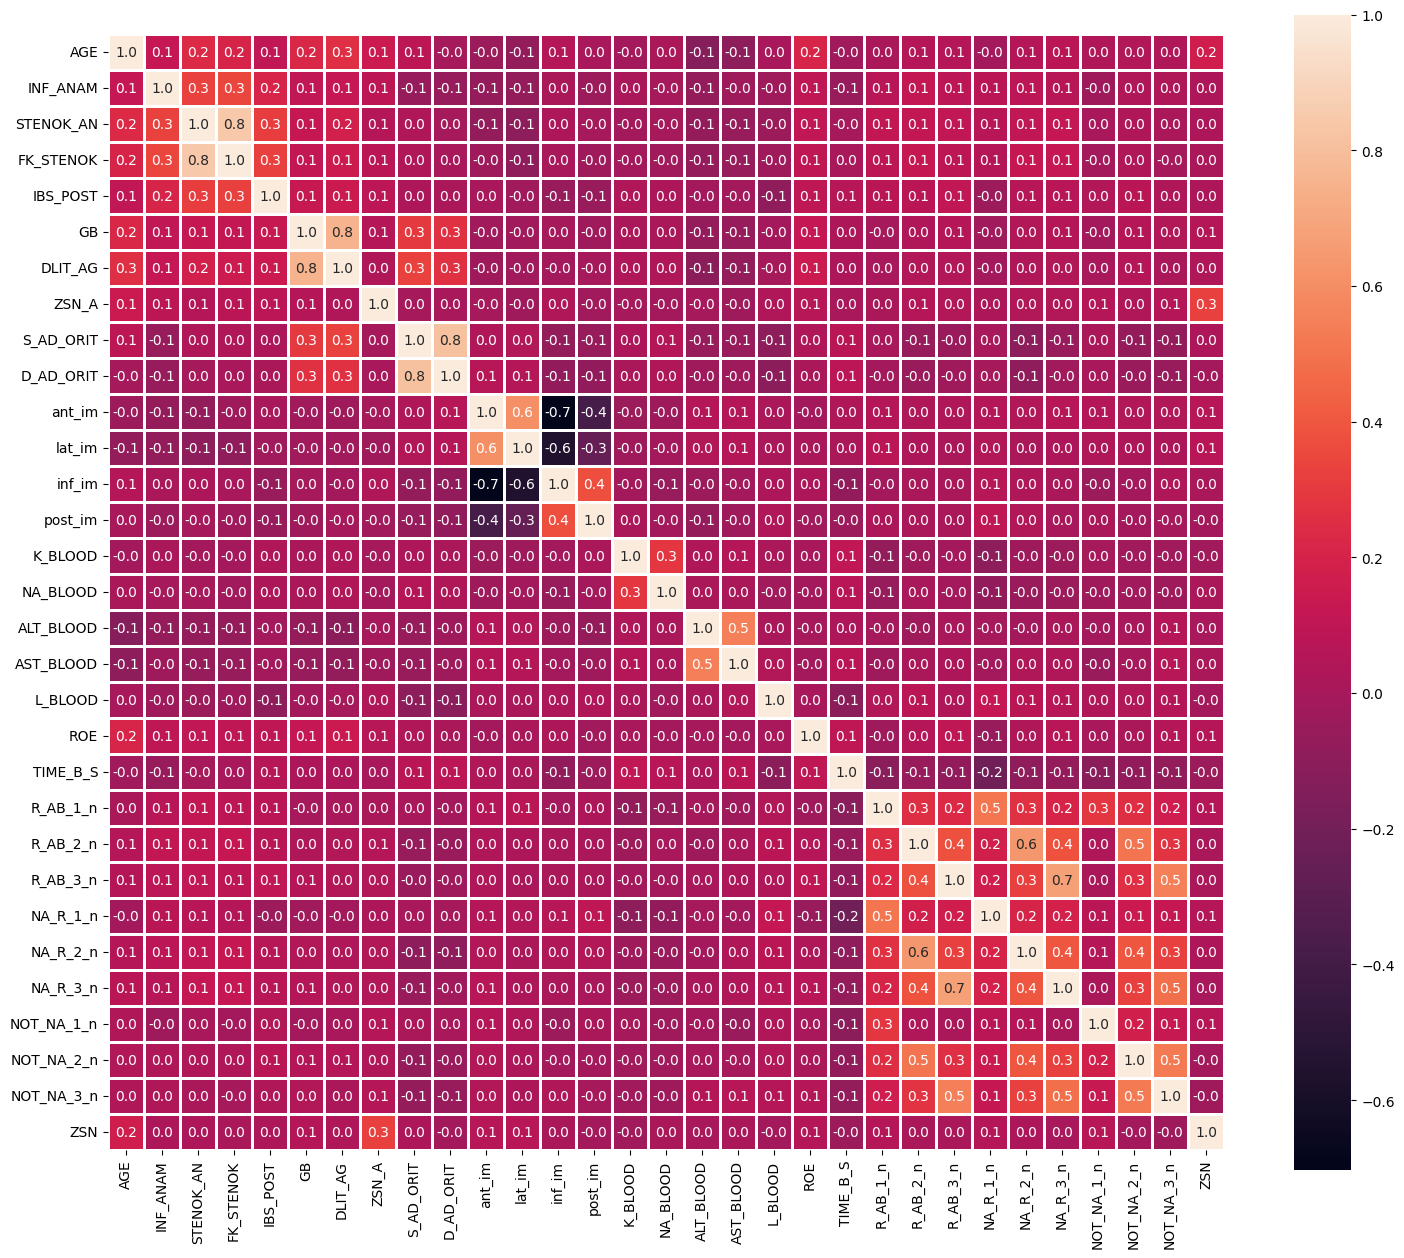

In [ ]:
pc_final = corr_df_test.corr(method = 'spearman')
fig3, ax3 = plt.subplots(figsize = (18,15))
ax3 = sns.heatmap(pc_final, linewidths = 1, annot = True, fmt = '.1f', square = True)

In [ ]:
matrix = corr_df_test.corr(method = 'pearson').abs()
#puts NaN values to the upper half and diagonal of the matrix
mask = np.triu(np.ones_like(matrix, dtype=bool))
reduced_matrix = matrix.mask(mask)
#find columns that meet the 0.80 threshold
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] >= 0.7)]
print(len(to_drop))
#drop the cols
# X_train = X_train.drop(to_drop, axis=1)
to_drop

3


['STENOK_AN', 'GB', 'S_AD_ORIT']

Text(0, 0.5, 'D_AD_ORIT')

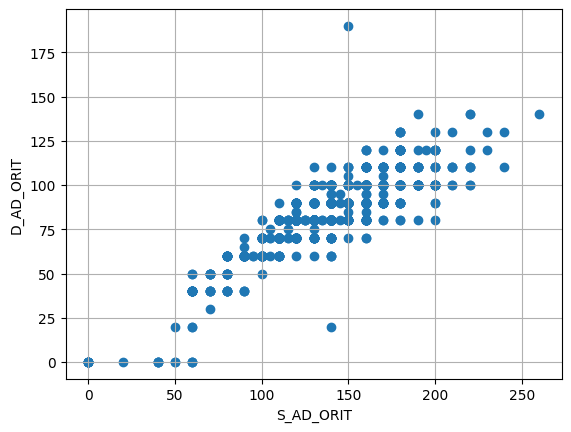

In [ ]:
plt.scatter(df['S_AD_ORIT'] ,df['D_AD_ORIT'] )
plt.grid()
plt.xlabel('S_AD_ORIT')
plt.ylabel('D_AD_ORIT')

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = {'columns' : [] , 'others' : []}  # dictionary  of all the names of correlated columns
    corr_matrix = dataset.corr('pearson')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                other = corr_matrix.columns[j]
                col_corr['columns'].append(colname)
                col_corr['others'].append(other)
    return col_corr

In [ ]:
test = correlation(corr_df_test,0.7)

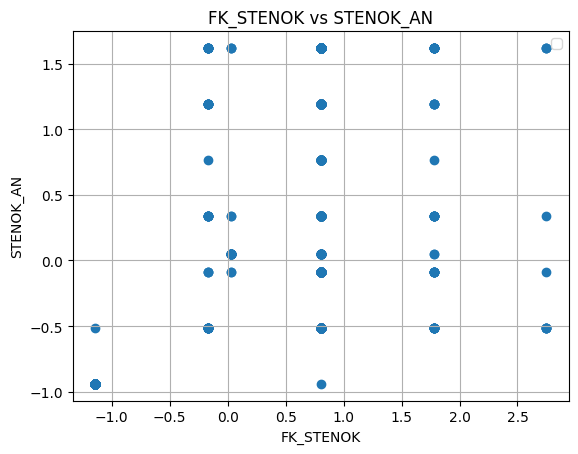

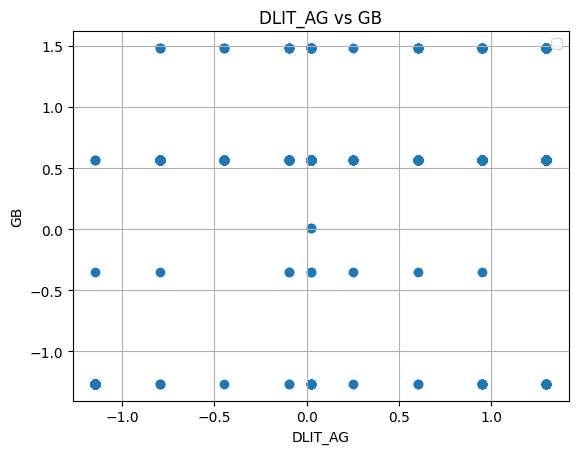

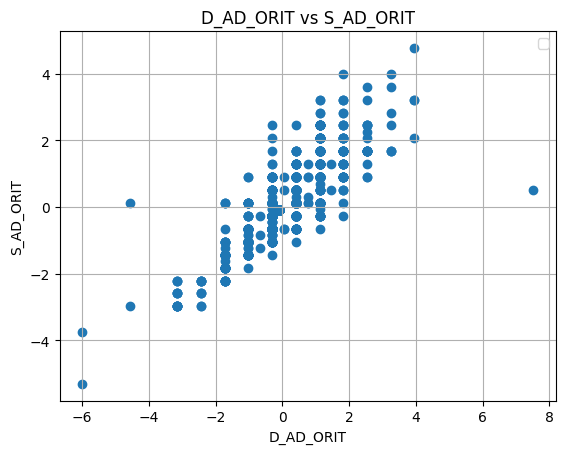

In [ ]:
test_zipped = zip(test['columns'] ,test['others'] )
for a,b in test_zipped :

    x = corr_df_test[a]
    y = corr_df_test[b]

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(x, y)
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_title("{} vs {}".format(a, b))
    plt.grid()
    plt.legend()
    plt.show()

In [ ]:
X_train_val = X_train_val_lof.drop(columns=to_drop ) # drop the highly correlated features from the training set
X_test = X_test.drop(columns=to_drop ) # drop the highly correlated features from the test set

In [ ]:
y_train_val = y_train_val_lof.copy(deep=True)

In [ ]:
# check the shapes after :
print(f"The shape of X_train_val after removing the correlated features {X_train_val.shape}")
print(f"The shape of X_test after removing the correlated features {X_test.shape}")

The shape of X_train_val after removing the correlated features (1484, 102)
The shape of X_test after removing the correlated features (170, 102)


In [ ]:
float_features = [x for x in float_features if x not in to_drop]    # modify float features

print(f"The data set contains {len(float_features)} float features ")

The data set contains 27 float features 


In [ ]:
Binary_features = [x for x in Binary_features if x not in to_drop] # modify binary features features

print(f"The data set contains {len(Binary_features)} Binary features ")

The data set contains 75 Binary features 


In [ ]:
# plot one of the classifiers results to compare all classification metricses and detect the issue
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_train_val = y_train_val_lof.copy(deep=True)
print('X_train_val.shape : ' , X_train_val.shape)
# We split the tarining data to train/val
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val \
                                                  , train_size = 0.8, random_state = 42,\
                                                  shuffle = False)


def conf_metrix(y_valid, y_pred):
    print(classification_report(y_valid, y_pred))
    columns = [0,1]
    confm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize = (10, 8))
    plt.title('Confusion matrix - Logistic_Regression_Default')
    df_cm = pd.DataFrame(confm, index = columns, columns = columns)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    ax = sns.heatmap(df_cm, cmap = 'Blues', annot = True)
    plt.savefig('./images/Confusion matrix - Logistic_Regression_Default.png' , dpi=300)
    plt.show()

X_train_val.shape :  (1484, 102)


              precision    recall  f1-score   support

           0       0.78      0.79      0.79       231
           1       0.24      0.23      0.23        66

    accuracy                           0.67       297
   macro avg       0.51      0.51      0.51       297
weighted avg       0.66      0.67      0.66       297



FileNotFoundError: [Errno 2] No such file or directory: './images/Confusion matrix - Logistic_Regression_Default.png'

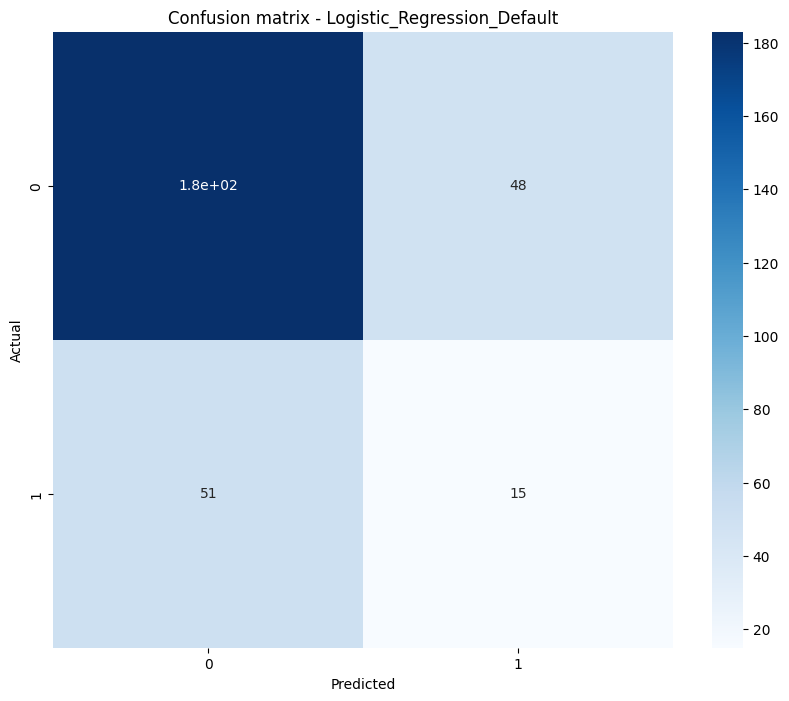

In [ ]:
# test for logistic since it has the lowest performance
clf = LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_valid)

conf_metrix(y_valid, y_pred)
plt

- Note : We can clearly see that the minority class is causing the high drop in performance we will apply some techniques to overcome this.

- we will choose lof and combine it with the feature selection methods

### Handling imbalanced data set :

#### A- Synthetic Minority Oversampling Technique (SMOTE) :

ZSN
0    1123
1     361
Name: count, dtype: int64

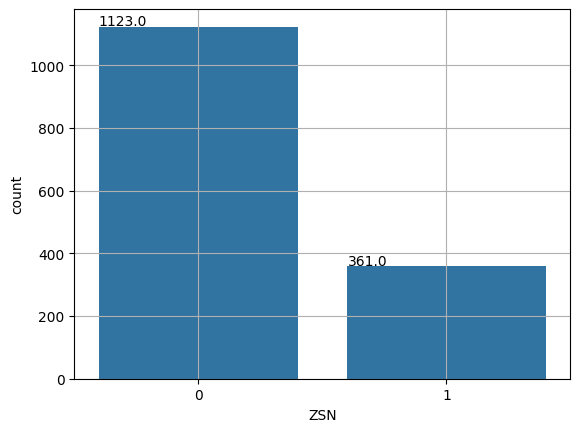

In [ ]:
ax = sns.barplot(x=y_train_val.value_counts().index, y=y_train_val.value_counts() )
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.grid()
y_train_val.value_counts()

In [ ]:
print(X_train_val.shape)
print(y_train_val.shape)

(1484, 102)
(1484,)


X_train_val was composed of 1484 rows. X_train_smote is composed of 2246 rows.


ZSN
0    1123
1    1123
Name: count, dtype: int64

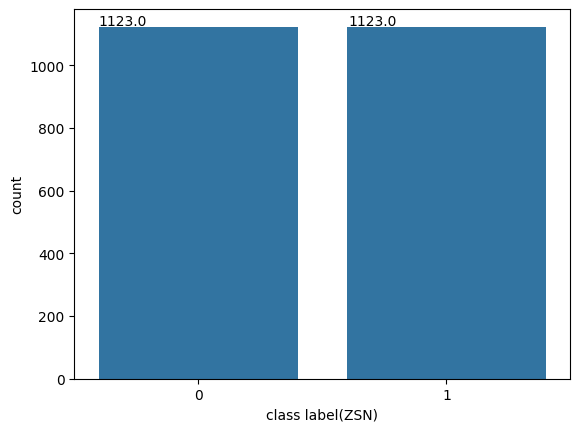

In [ ]:
sm = SMOTE(sampling_strategy='minority' , random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_val, y_train_val)
print(f"X_train_val was composed of {len(X_train_val)} rows. X_train_smote is composed of {len(X_train_smote)} rows.")
test = X_train_smote.copy(deep = True)
test['ZSN'] = y_train_smote
ax = sns.barplot(x=y_train_smote.value_counts().index, y=y_train_smote.value_counts())
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.xlabel('class label(ZSN)')
plt.ylabel('count')
y_train_smote.value_counts()

In [ ]:
def Train_evaluate(X_train_val, y_train_val , method_name , models = models ):
    t = PrettyTable()  # visualiza the results in a well compact table
    t.field_names = ['classifier', 'f1', 'auc', 'accuracy' , 'execution_time'] #f1 , auc , pr_auc

    # We split the tarining data to train/val
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val \
                                                      , train_size = 0.8, random_state = 42,\
                                                      shuffle = True)
    # compare the results of all models with default settings
    for clf_name ,clf  in models.items():

        f1 , auc , accuracy , execution_time= model_eval (X_train, X_valid, y_train, y_valid , clf , clf_name)
        t.add_row ([clf_name , f1 , auc , accuracy , execution_time])

    print(f'Results for {method_name} are : \n' , t)

In [ ]:
Train_evaluate(X_train_smote, y_train_smote , method_name = 'SMOTE', models = models )

Results for SMOTE are : 
 +------------------------+--------------------+--------------------+--------------------+----------------+
|       classifier       |         f1         |        auc         |      accuracy      | execution_time |
+------------------------+--------------------+--------------------+--------------------+----------------+
|  KNeighborsClassifier  | 0.8163265306122449 |        0.8         |        0.8         |     0.048      |
|          SVC           | 0.8183807439824945 | 0.8155555555555556 | 0.8155555555555556 |     0.313      |
|   LogisticRegression   | 0.712087912087912  | 0.7088888888888889 | 0.7088888888888889 |     0.055      |
| RandomForestClassifier | 0.9069767441860465 | 0.9111111111111112 | 0.9111111111111111 |     0.994      |
+------------------------+--------------------+--------------------+--------------------+----------------+


#### B-  Adaptive Synthetic (ADASYN) :

- This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42 )
X_train_cc, y_train_cc = adasyn.fit_resample(X_train_val, y_train_val)
print(f"x_train was composed of {len(X_train_val)} rows. X_train_cc is composed of {len(X_train_cc)} rows.")

ax = sns.barplot(x=y_train_cc.value_counts().index, y=y_train_cc.value_counts())
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
y_train_cc.value_counts()

In [ ]:
Train_evaluate(X_train_cc, y_train_cc , method_name = 'ADASYN', models = models )

Results for ADASYN are : 
 +------------------------+--------------------+--------------------+--------------------+----------------+
|       classifier       |         f1         |        auc         |      accuracy      | execution_time |
+------------------------+--------------------+--------------------+--------------------+----------------+
|  KNeighborsClassifier  | 0.7991718426501035 | 0.796416365589298  | 0.7863436123348018 |     0.046      |
|          SVC           | 0.8428246013667425 | 0.8507469973635386 | 0.8480176211453745 |     0.340      |
|   LogisticRegression   | 0.6930232558139534 | 0.7095205546333365 | 0.7092511013215859 |     0.054      |
| RandomForestClassifier | 0.8810126582278481 | 0.8917781466653647 | 0.8964757709251101 |     0.511      |
+------------------------+--------------------+--------------------+--------------------+----------------+


### feature Extraction and feature selection :

#### A- Wrapper methods: Sequential Backward Selection :

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# SINCE the data set is not very large scaled we can apply this strategy of elemenating 1 feature at a time
# and monitor the model performance
best_features = PrettyTable()  # visualiza the results in a well compact table
best_features.field_names = ['classifier', 'CV Score', 'execution_time']
selected = {'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors=4 ) ,\
           'SVC' : SVC(random_state=42)   }
sfs_features = {}
for clf_name ,clf  in selected.items():
    start = time.time()
    sbs = SFS(clf,
              k_features = 40,
              forward = False,
              floating = False,
              scoring = 'f1',
              cv = 5,
              n_jobs = -1)
    sbs = sbs.fit(X_train_smote, y_train_smote)
    end = time.time()
    execution_time = f'{end - start :0.3f}'
    indices = list(sbs.k_feature_idx_)
    new_columns = X_train.columns[indices].tolist()
    sfs_features[clf_name] = new_columns # Save the features selected by each model
    print('*'*50,'\n', f'The best cv score achived by {clf_name} is {sbs.k_score_:0.3f} with {len(new_columns)} Best Feature' )
    best_features.add_row([clf_name , sbs.k_score_ , execution_time])

print(best_features)


************************************************** 
 The best cv score achived by KNeighborsClassifier is 0.832 with 40 Best Feature
************************************************** 
 The best cv score achived by SVC is 0.841 with 40 Best Feature
+----------------------+--------------------+----------------+
|      classifier      |      CV Score      | execution_time |
+----------------------+--------------------+----------------+
| KNeighborsClassifier | 0.8319231276622409 |    903.104     |
|         SVC          | 0.8406636892974666 |    5973.925    |
+----------------------+--------------------+----------------+


In [ ]:
# save the features names extracted by sfs knn
sfs_features_KNN = pd.Series(data =sfs_features['KNeighborsClassifier'] , name='sfs_features_KNN' , index = None)

sfs_features_KNN.to_csv('sfs_features_KNN.csv' , header = True )

In [ ]:
# save the features names extracted by sfs svc
sfs_features_SVC = pd.Series(data =sfs_features['SVC'] , name='sfs_features_SVC' , index = None)

sfs_features_SVC.to_csv('sfs_features_SVC.csv' , header = True )

In [ ]:
# x = pd.read_csv('sfs_features_SVC.csv' , header = 0)

In [ ]:
# y =x.sfs_features_SVC.to_list()

In [ ]:
# X_train_smote[y].shape

- SELECT THE COLUMNS FOR EACH FROM THE TRAIN AND TEST DATASETS

In [ ]:
X_train_SFS_KNN = X_train_smote[sfs_features_KNN]
X_train_SFS_KNN.shape

(2246, 40)

In [ ]:
X_test_SFS_KNN = X_test[sfs_features_KNN]
X_test_SFS_KNN.shape

(170, 40)

In [ ]:
X_train_SFS_SVC = X_train_smote[sfs_features_SVC]
X_train_SFS_SVC.shape

(2246, 40)

In [ ]:
X_test_SFS_SVC = X_test[sfs_features_SVC]

X_test_SFS_SVC.shape

(170, 40)

- Micro avg use individual true and false positives also false negatives.
- Micro avg is just mean of presicion+recall
- So Micro average reftlect the accuracy on imbalanced data better.

#### B- Embedded methods :

- 1- Logistic Regression Feature Importance :  

In [ ]:

logis = LogisticRegression(random_state=42)
logis.fit(X_train_smote , y_train_smote)

LogisticRegression(random_state=42)

In [ ]:
feature_names = logis.feature_names_in_

In [ ]:
def Extract_feature_importance (clf , feature_names) :
    feature_importance = (pd.DataFrame({"feature_name" : feature_names ,
                                       "coefficient" : clf.coef_[0]})\
                                        .sort_values("coefficient" , ascending = False).reset_index() )
    return feature_importance

- extract the top_40 features by logis

In [ ]:
feature_importance = Extract_feature_importance (logis , feature_names)

In [ ]:
feature_importances = feature_importance.sort_values('coefficient' , ascending=False , key= lambda col : abs(col) )

In [ ]:
feature_importances.reset_index(inplace=True)

In [ ]:
feature_importances

,level_0,index,feature_name,coefficient
0,0,7,ZSN_A,0.553632
1,1,0,AGE,0.456450
2,101,32,K_SH_POST,-0.386325
3,100,44,ritm_ecg_p_04,-0.358538
4,2,59,n_p_ecg_p_04,0.352868
...,...,...,...,...
97,47,60,n_p_ecg_p_05,0.000550
98,50,45,ritm_ecg_p_06,0.000550
99,49,21,np_10,0.000550
100,48,13,nr_07,0.000550


In [ ]:
coeff = feature_importances.loc[:39 , ['coefficient'] ].coefficient.tolist()

In [ ]:
logis_Features = feature_importances.loc[:39 , ['feature_name'] ].feature_name.tolist()

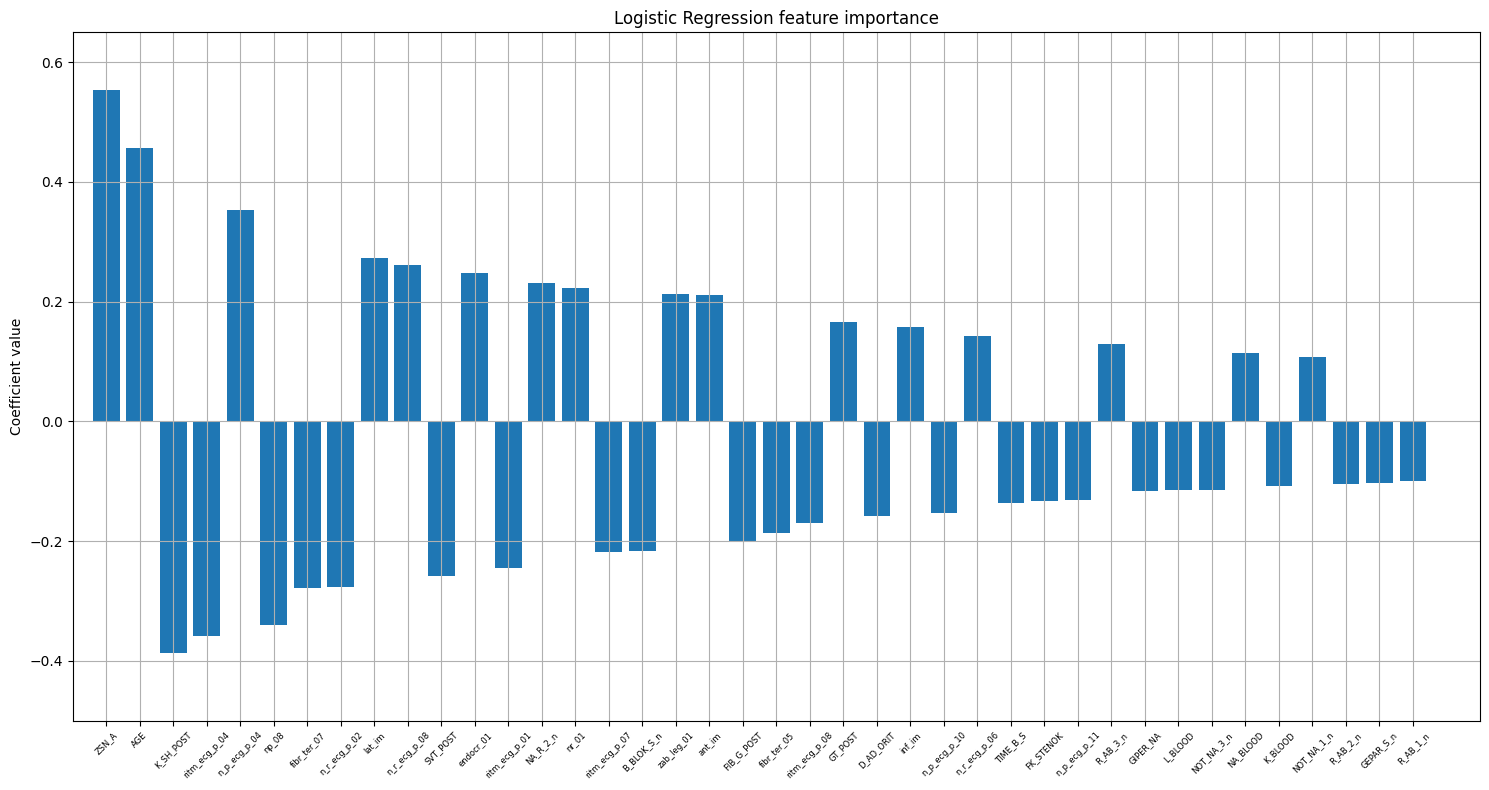

In [ ]:
# Plot the feature importances of the logis
plt.figure(figsize=(15,8))
plt.title("Logistic Regression feature importance")
plt.bar(range(len(coeff)), coeff)
plt.ylabel('Coefficient value')
plt.xticks(range(len(coeff)),logis_Features , rotation=45 , fontsize = 6)
plt.xlim([-1, len(coeff)+1])
plt.ylim([-0.5, 0.65])

plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
len(logis_Features)

40

###### - we will examin the selected feature with K_fold cross validation

In [ ]:
X_train_val_logis = X_train_smote[logis_Features]
X_train_val_logis.shape

(2246, 40)

In [ ]:
X_test_logis = X_test[logis_Features]
X_test_logis.shape

(170, 40)

In [ ]:
sum(X_train_val_logis.columns == X_test_logis.columns)

40

In [ ]:
from sklearn.model_selection import cross_val_score , StratifiedKFold , KFold

In [ ]:
cv = StratifiedKFold(n_splits= 5 , shuffle=True , random_state=42)
f1_array = cross_val_score(logis,X=X_train_val_logis , y= y_train_smote ,  cv=cv ,  scoring='f1_micro')
print(f'The micro avg f1 = {100*f1_array.mean():0.3f} with std = {f1_array.std():0.3f} ')

The micro avg f1 = 69.101 with std = 0.027 


In [ ]:
start = time.time()
cv = KFold(n_splits= 10 , shuffle=True , random_state=42)
f1_array = cross_val_score(logis,X=X_train_smote , y= y_train_smote ,  cv=cv ,  scoring='f1_micro')
end = time.time()
execution_time = f'{end - start :0.3f}'
print(f'The micro avg f1 = {100*f1_array.mean():0.3f} with std = {f1_array.std():0.3f} , time = {execution_time}')

The micro avg f1 = 68.164 with std = 0.023 , time = 0.974


- 2- Random Forest Impurity based Feature Importance :  

,AGE,SEX,INF_ANAM,FK_STENOK,IBS_POST,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS
0,-0.558490,0.749149,0.575707,-1.139941,-1.435197,-0.183804,-1.144053,-0.280724,-0.168005,-0.051198,...,-0.277744,-0.229215,1.591693,-0.390011,0.673046,0.626239,0.566783,-0.138998,1.918046,-0.334542
1,-0.824939,0.749149,-0.648800,-1.139941,1.067121,-0.183804,-0.445907,-0.280724,-0.168005,-0.051198,...,5.045412,5.883347,1.591693,2.564031,-1.485782,0.626239,0.566783,-0.138998,-0.521364,-0.334542
2,0.596123,-1.334848,-0.648800,-1.139941,1.067121,-0.183804,-0.096834,1.555439,-0.168005,-0.051198,...,-0.277744,-0.229215,-0.628262,-0.390011,0.673046,0.626239,0.566783,-0.138998,-0.521364,-0.334542
3,-0.114408,0.749149,-0.648800,-1.139941,1.067121,-0.183804,1.299458,-0.280724,-0.168005,-0.051198,...,-0.277744,-0.229215,-0.628262,-0.390011,0.673046,-1.596836,0.566783,-0.138998,1.918046,-0.334542
4,0.240858,0.749149,-0.648800,0.804598,-0.184038,-0.183804,-1.144053,-0.280724,-0.168005,-0.051198,...,-0.277744,-0.229215,-0.628262,2.564031,-1.485782,0.626239,0.566783,-0.138998,-0.521364,2.989158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,0.477398,0.608791,2.942250,0.804598,1.067121,-0.183804,1.275948,-0.280724,-0.168005,-0.051198,...,-0.277744,-0.229215,-0.628262,-0.390011,0.673046,0.626239,-1.607339,-0.138998,1.753750,-0.334542
2242,-0.721527,0.749149,-0.648800,-1.139941,0.021579,-0.183804,-1.144053,-0.280724,-0.168005,-0.051198,...,-0.277744,-0.229215,0.664130,-0.390011,-0.228976,0.626239,0.566783,-0.138998,1.918046,-0.334542
2243,0.268234,0.749149,0.152171,0.804598,1.067121,-0.183804,-1.144053,-0.280724,3.835318,-0.051198,...,-0.277744,-0.229215,1.591693,-0.390011,-1.485782,0.626239,-0.239513,-0.138998,-0.521364,-0.334542
2244,0.820197,0.749149,1.800214,0.804598,1.067121,-0.183804,0.373892,0.415337,2.152066,-0.051198,...,-0.277744,-0.229215,-0.628262,-0.390011,-0.145332,-0.754103,-0.880649,-0.138998,-0.521364,-0.334542


In [ ]:
rf = RandomForestClassifier(n_estimators=1000,random_state=42 )
rf.fit(X_train_smote , y_train_smote)

RandomForestClassifier(n_estimators=1000, random_state=42)

- extract the top 40 features due to random forest

In [ ]:
importance_vals = rf.feature_importances_
names = rf.feature_names_in_
x = dict(zip(names,importance_vals))

sorted_by_importance = sorted(x.items(), key=lambda x: x[1], reverse=True)

top_40 = sorted_by_importance[:40]

top_40_features = [x[0] for x in top_40]


ind_40 = [np.round(x[1] , 3 )for x in top_40]

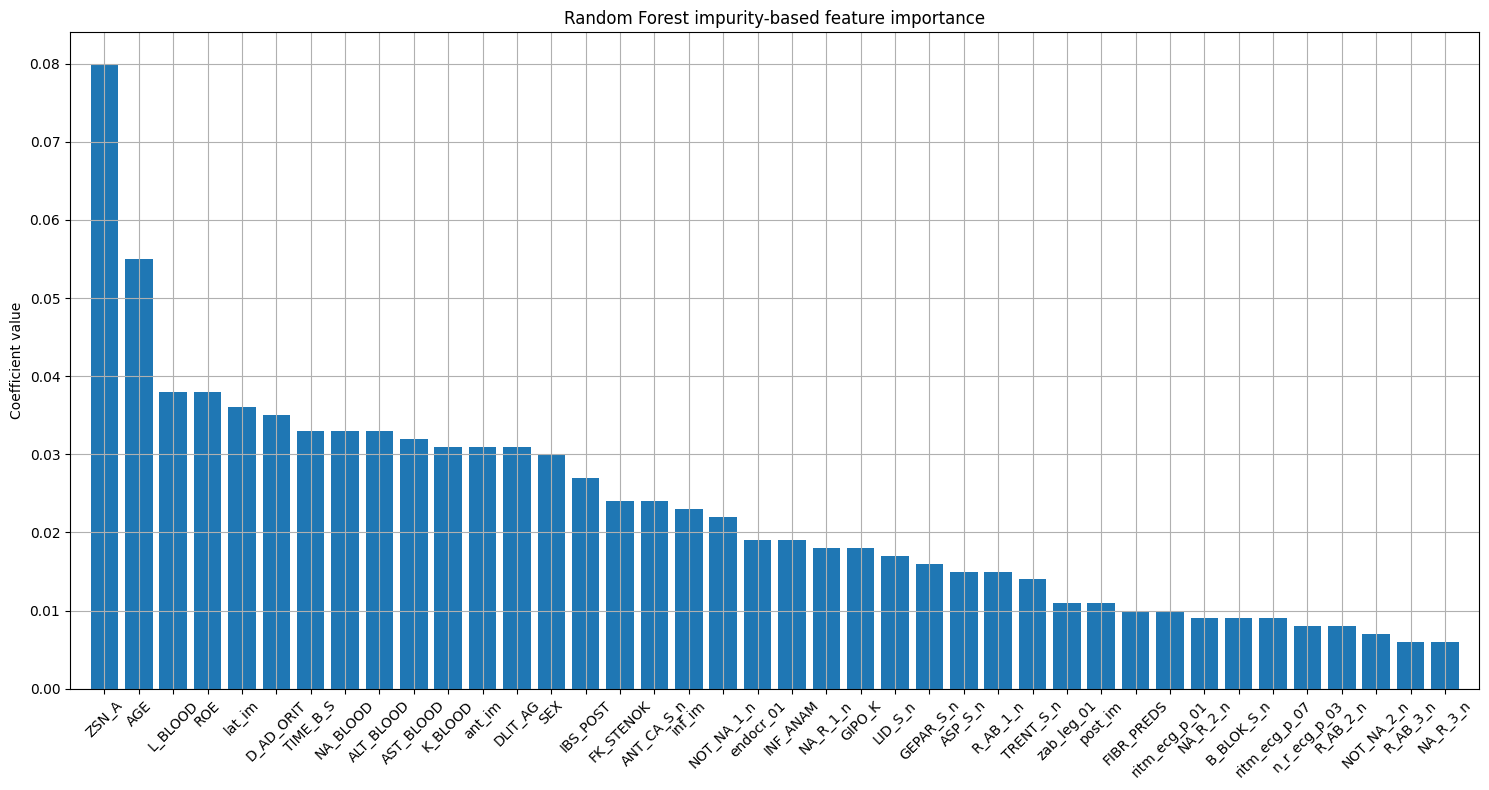

In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Random Forest impurity-based feature importance")
plt.bar(range(len(ind_40)), ind_40)

plt.xticks(range(len(ind_40)),top_40_features , rotation=45)
plt.xlim([-1, len(ind_40)])
plt.ylabel('Coefficient value')
# plt.ylim([0, 0.5])
plt.grid()
plt.tight_layout()
plt.show()

- we will examin the selected feature with K_fold cross validation

In [ ]:
X_train_val_rf = X_train_smote[top_40_features]
X_train_val_rf.shape

(2246, 40)

In [ ]:
X_test_rf = X_test[top_40_features]
X_test_rf.shape

(170, 40)

In [ ]:
from sklearn.model_selection import cross_val_score , StratifiedKFold

In [ ]:
start = time.time()
cv = KFold(n_splits= 10 , shuffle=True , random_state=42)
f1_array = cross_val_score(logis,X=X_train_smote , y= y_train_smote ,  cv=cv ,  scoring='f1_micro')
end = time.time()
execution_time = f'{end - start :0.3f}'
print(f'The micro avg f1 = {100*f1_array.mean():0.3f} with std = {f1_array.std():0.3f} , time = {execution_time}')

The micro avg f1 = 68.164 with std = 0.023 , time = 0.774


In [ ]:
start = time.time()
cv = StratifiedKFold(n_splits= 5 , shuffle=True , random_state=42)
f1_array = cross_val_score(rf,X=X_train_val_rf , y= y_train_smote ,  cv=cv ,  scoring='f1_micro')
end = time.time()
execution_time = f'{end - start :0.3f}'
print(f'The micro avg f1 = {100*f1_array.mean():0.3f} with std = {f1_array.std():0.3f} , time = {execution_time}')

The micro avg f1 = 87.756 with std = 0.014 , time = 25.989


# **D7K bel Gbna**

In [ ]:
df = pd.read_csv('/content/sfs_features_SVC.csv')
df

,Unnamed: 0,sfs_features_SVC
0,0,AGE
1,1,SEX
2,2,FK_STENOK
3,3,IBS_POST
4,4,SIM_GIPERT
5,5,DLIT_AG
6,6,ZSN_A
7,7,nr_03
8,8,endocr_01
9,9,zab_leg_01
